In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sales = pd.read_csv("Sales.csv", index_col = False)
sales.shape


(188157, 20)

In [29]:

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188157 entries, 0 to 188156
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ProductKey             188157 non-null  int64  
 1   CustomerKey            188157 non-null  int64  
 2   OrderQuantity          188157 non-null  int64  
 3   OverallProductCost     188157 non-null  float64
 4   SalesAmount            188157 non-null  float64
 5   Profit                 188157 non-null  float64
 6   CurrencyName           188157 non-null  object 
 7   SalesReasonName        188157 non-null  object 
 8   SalesTerritoryKey      188157 non-null  int64  
 9   SalesTerritoryGroup    188157 non-null  object 
 10  SalesTerritoryCountry  188157 non-null  object 
 11  SalesTerritoryRegion   188157 non-null  object 
 12  OrderDateKey           188157 non-null  int64  
 13  DueDateKey             188157 non-null  int64  
 14  ShipDateKey            188157 non-nu

In [30]:
sales.isna().sum()

ProductKey               0
CustomerKey              0
OrderQuantity            0
OverallProductCost       0
SalesAmount              0
Profit                   0
CurrencyName             0
SalesReasonName          0
SalesTerritoryKey        0
SalesTerritoryGroup      0
SalesTerritoryCountry    0
SalesTerritoryRegion     0
OrderDateKey             0
DueDateKey               0
ShipDateKey              0
OrderDate                0
Weekday                  0
Month                    0
Quarter                  0
Year                     0
dtype: int64

In [31]:
sales.head()

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,CurrencyName,SalesReasonName,SalesTerritoryKey,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,OrderDateKey,DueDateKey,ShipDateKey,OrderDate,Weekday,Month,Quarter,Year
0,310,21768,1,2547.0126,3578.27,1031.2574,Canadian Dollar,Manufacturer,6,North America,Canada,Canada,20101229,20110110,20110105,12/29/2010,Wednesday,December,4,2010
1,310,21768,1,2547.0126,3578.27,1031.2574,Canadian Dollar,Quality,6,North America,Canada,Canada,20101229,20110110,20110105,12/29/2010,Wednesday,December,4,2010
2,311,27645,1,2547.0126,3578.27,1031.2574,US Dollar,Manufacturer,4,North America,United States,Southwest,20101230,20110111,20110106,12/30/2010,Thursday,December,4,2010
3,311,27645,1,2547.0126,3578.27,1031.2574,US Dollar,Quality,4,North America,United States,Southwest,20101230,20110111,20110106,12/30/2010,Thursday,December,4,2010
4,310,16624,1,2547.0126,3578.27,1031.2574,Australian Dollar,Manufacturer,9,Pacific,Australia,Australia,20101230,20110111,20110106,12/30/2010,Thursday,December,4,2010


In [32]:
#from the info we can see that there are no null values, we can just drop the columns we don't need
#Dropping columns
sales.drop(columns = ["CurrencyName", "SalesTerritoryKey", "OrderDateKey", "DueDateKey", "ShipDateKey"], inplace = True)


In [7]:
sales.head()

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,SalesReasonName,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion,OrderDate,Weekday,Month,Quarter,Year
0,310,21768,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
1,310,21768,1,2547.0126,3578.27,1031.2574,Quality,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
2,311,27645,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
3,311,27645,1,2547.0126,3578.27,1031.2574,Quality,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
4,310,16624,1,2547.0126,3578.27,1031.2574,Manufacturer,Pacific,Australia,Australia,12/30/2010,Thursday,December,4,2010


In [33]:
sales.describe()

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,Quarter,Year
count,188157.000000,188157.000000,188157.0,188157.000000,188157.000000,188157.000000,188157.000000,188157.000000
mean,446.538237,18798.441036,1.0,235.441547,340.980965,105.539418,2.655160,2012.986437
std,117.215695,5381.948442,0.0,550.125067,786.148259,239.104014,1.103456,0.331087
min,214.000000,11000.000000,1.0,1.097000,2.290000,1.123700,1.000000,2010.000000
25%,378.000000,13995.000000,1.0,2.390300,4.990000,2.599700,2.000000,2013.000000
50%,480.000000,18121.000000,1.0,11.730800,24.490000,11.451600,3.000000,2013.000000
75%,529.000000,23282.000000,1.0,33.525300,49.990000,18.229700,4.000000,2013.000000
max,606.000000,29483.000000,1.0,2547.012600,3578.270000,1031.257400,4.000000,2014.000000


In [34]:
#changing the year and quarter columns to strings
sales["Year"], sales["Quarter"] = sales["Year"].astype(str), sales["Quarter"].astype(str)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188157 entries, 0 to 188156
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ProductKey             188157 non-null  int64  
 1   CustomerKey            188157 non-null  int64  
 2   OrderQuantity          188157 non-null  int64  
 3   OverallProductCost     188157 non-null  float64
 4   SalesAmount            188157 non-null  float64
 5   Profit                 188157 non-null  float64
 6   SalesReasonName        188157 non-null  object 
 7   SalesTerritoryGroup    188157 non-null  object 
 8   SalesTerritoryCountry  188157 non-null  object 
 9   SalesTerritoryRegion   188157 non-null  object 
 10  OrderDate              188157 non-null  object 
 11  Weekday                188157 non-null  object 
 12  Month                  188157 non-null  object 
 13  Quarter                188157 non-null  object 
 14  Year                   188157 non-nu

In [35]:
sales.rename(columns = {"SalesReasonName" : "SalesReason", "SalesTerritoryGroup": "Continent",
             "SalesTerritoryCountry": "Country", "SalesTerritoryRegion": "Region"}, inplace = True)

sales

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,SalesReason,Continent,Country,Region,OrderDate,Weekday,Month,Quarter,Year
0,310,21768,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
1,310,21768,1,2547.0126,3578.27,1031.2574,Quality,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
2,311,27645,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
3,311,27645,1,2547.0126,3578.27,1031.2574,Quality,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
4,310,16624,1,2547.0126,3578.27,1031.2574,Manufacturer,Pacific,Australia,Australia,12/30/2010,Thursday,December,4,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188152,486,18759,1,76.1610,159.00,82.8390,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188153,225,18759,1,7.8663,8.99,1.1237,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188154,485,18759,1,10.5284,21.98,11.4516,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188155,486,18759,1,76.1610,159.00,82.8390,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014


In [13]:
sales_per_year = pd.DataFrame(sales.groupby("Year")["SalesAmount"].sum())
sales_per_year


,SalesAmount
Year,
2010,5.009578e+04
2011,1.107258e+07
2012,3.631891e+06
2013,4.927022e+07
2014,1.331755e+05


''

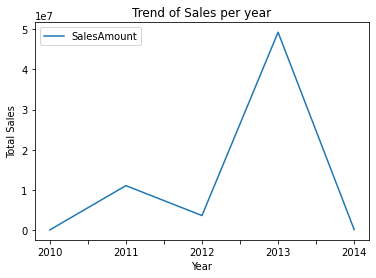

In [19]:
sales_per_year.plot(kind = "line", xlabel = "Year", ylabel = "Total Sales", title = "Trend of Sales per year")
;

In [44]:
sales_per_country = pd.DataFrame(sales.groupby("Country")["SalesAmount"].sum().sort_values())
sales_per_country

,SalesAmount
Country,
Canada,4.586597e+06
France,5.769536e+06
Germany,6.807178e+06
United Kingdom,7.822411e+06
Australia,1.705983e+07
United States,2.211240e+07


<AxesSubplot:title={'center':'Total Sales per Country'}, xlabel='Country', ylabel='Total Sales'>

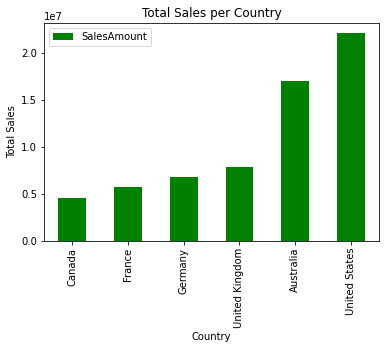

In [51]:
sales_per_country.plot(kind = "bar",
                      xlabel = "Country",
                      ylabel = "Total Sales",
                      title = "Total Sales per Country",
                      color = "green")

<AxesSubplot:title={'center':'Sales in US Regions'}, xlabel='Region', ylabel='Total Sales'>

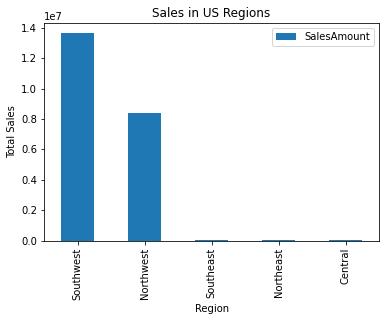

In [60]:
sales_in_us = sales[sales["Country"] == "United States"]
sales_in_us_region = pd.DataFrame(sales_in_us.groupby("Region")["SalesAmount"].sum()
                                  .sort_values(ascending = False))
sales_in_us_region
sales_in_us_region.plot(kind = "bar", xlabel = "Region",
                       ylabel = "Total Sales", title  = "Sales in US Regions")


In [56]:
sales_in_us_region

,SalesAmount
Region,
Southwest,1.362861e+07
Northwest,8.410377e+06
Southeast,4.943008e+04
Northeast,1.598112e+04
Central,7.998280e+03


<AxesSubplot:ylabel='Days of the Week'>

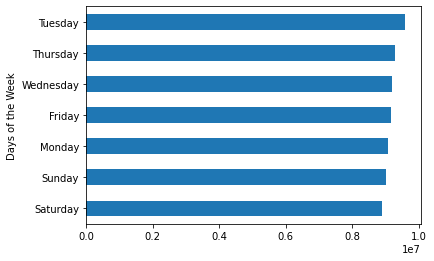

In [67]:
pd.DataFrame(sales.groupby("Weekday")["SalesAmount"].
            sum().sort_values()).plot(kind = "barh", legend = False,
                                     ylabel = "Sales", xlabel = "Days of the Week",
                                     title = "Total Sales per days")

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Month', ylabel='Sales'>

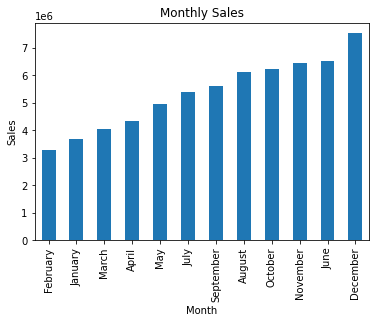

In [72]:
pd.DataFrame(sales.groupby("Month")["SalesAmount"].
            sum().sort_values()).plot(kind = "bar", legend = False,
                                     ylabel = "Sales", xlabel = "Month",
                                     title = "Monthly Sales")

<AxesSubplot:title={'center':'Quarterly Sales'}, ylabel='SalesAmount'>

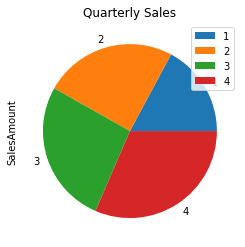

In [77]:
pd.DataFrame(sales.groupby("Quarter")["SalesAmount"].
            sum().sort_values()).plot(kind = "pie", y = "SalesAmount",
                                     title = "Quarterly Sales")

<AxesSubplot:title={'center':'Quarterly Sales'}, xlabel='Quarter', ylabel='Total Sales'>

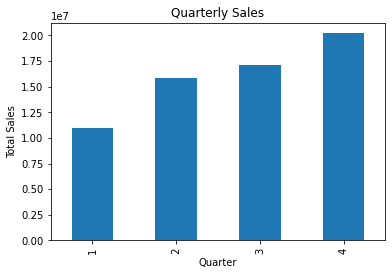

In [78]:
pd.DataFrame(sales.groupby("Quarter")["SalesAmount"].
            sum().sort_values()).plot(kind = "bar", xlabel = "Quarter",
                                      ylabel = "Total Sales", legend = False,
                                     title = "Quarterly Sales")

In [79]:
sales

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,SalesReason,Continent,Country,Region,OrderDate,Weekday,Month,Quarter,Year
0,310,21768,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
1,310,21768,1,2547.0126,3578.27,1031.2574,Quality,North America,Canada,Canada,12/29/2010,Wednesday,December,4,2010
2,311,27645,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
3,311,27645,1,2547.0126,3578.27,1031.2574,Quality,North America,United States,Southwest,12/30/2010,Thursday,December,4,2010
4,310,16624,1,2547.0126,3578.27,1031.2574,Manufacturer,Pacific,Australia,Australia,12/30/2010,Thursday,December,4,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188152,486,18759,1,76.1610,159.00,82.8390,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188153,225,18759,1,7.8663,8.99,1.1237,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188154,485,18759,1,10.5284,21.98,11.4516,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014
188155,486,18759,1,76.1610,159.00,82.8390,Price,North America,Canada,Canada,1/28/2014,Tuesday,January,1,2014


In [121]:
sales[["SalesAmount", "OverallProductCost", "Profit", "OrderQuantity"]].sum()

SalesAmount           6.415796e+07
OverallProductCost    4.429998e+07
Profit                1.985798e+07
OrderQuantity         1.881570e+05
dtype: float64

In [82]:
#importing the products table
products = pd.read_csv("Products.csv")

In [83]:
products.head()

,ProductKey,ProductSubcategoryKey,ProductCategoryKey,ProductName,ProductCategory,ProductSubcategory,StandardCost,FinishedGoodsFlag,DaysToManufacture,ProductLine
0,212,31,4,"Sport-100 Helmet, Red",Accessories,Helmets,12.0278,Yes,0,Sports
1,213,31,4,"Sport-100 Helmet, Red",Accessories,Helmets,13.8782,Yes,0,Sports
2,214,31,4,"Sport-100 Helmet, Red",Accessories,Helmets,13.0863,Yes,0,Sports
3,215,31,4,"Sport-100 Helmet, Black",Accessories,Helmets,12.0278,Yes,0,Sports
4,216,31,4,"Sport-100 Helmet, Black",Accessories,Helmets,13.8782,Yes,0,Sports


In [84]:
products.shape

(378, 10)

In [85]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             378 non-null    int64  
 1   ProductSubcategoryKey  378 non-null    int64  
 2   ProductCategoryKey     378 non-null    int64  
 3   ProductName            378 non-null    object 
 4   ProductCategory        378 non-null    object 
 5   ProductSubcategory     378 non-null    object 
 6   StandardCost           378 non-null    float64
 7   FinishedGoodsFlag      378 non-null    object 
 8   DaysToManufacture      378 non-null    int64  
 9   ProductLine            378 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 29.7+ KB


In [87]:
products.isna().sum()

ProductKey               0
ProductSubcategoryKey    0
ProductCategoryKey       0
ProductName              0
ProductCategory          0
ProductSubcategory       0
StandardCost             0
FinishedGoodsFlag        0
DaysToManufacture        0
ProductLine              0
dtype: int64

In [88]:
#dropping columns
products.drop(columns = ["ProductSubcategoryKey", "ProductCategoryKey", "FinishedGoodsFlag"], inplace = True)

In [89]:
products

,ProductKey,ProductName,ProductCategory,ProductSubcategory,StandardCost,DaysToManufacture,ProductLine
0,212,"Sport-100 Helmet, Red",Accessories,Helmets,12.0278,0,Sports
1,213,"Sport-100 Helmet, Red",Accessories,Helmets,13.8782,0,Sports
2,214,"Sport-100 Helmet, Red",Accessories,Helmets,13.0863,0,Sports
3,215,"Sport-100 Helmet, Black",Accessories,Helmets,12.0278,0,Sports
4,216,"Sport-100 Helmet, Black",Accessories,Helmets,13.8782,0,Sports
...,...,...,...,...,...,...,...
373,599,"Mountain-500 Black, 48",Bikes,Mountain Bikes,294.5797,4,Mountain
374,600,"Mountain-500 Black, 52",Bikes,Mountain Bikes,294.5797,4,Mountain
375,604,"Road-750 Black, 44",Bikes,Road Bikes,343.6496,4,Road
376,605,"Road-750 Black, 48",Bikes,Road Bikes,343.6496,4,Road


In [101]:
products.describe()

,ProductKey,StandardCost
count,378.000000,378.000000
mean,404.857143,451.007441
std,113.617002,501.937676
min,212.000000,0.856500
25%,306.250000,36.249925
50%,406.500000,294.579700
75%,501.500000,704.881450
max,606.000000,2171.294200


<AxesSubplot:>

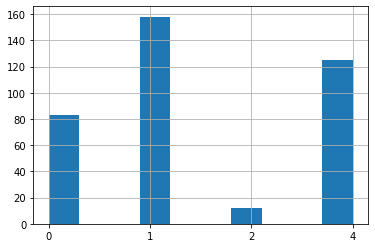

In [91]:
products["DaysToManufacture"] = products["DaysToManufacture"].astype(str)
products["DaysToManufacture"].hist()

Text(0.5, 1.0, 'Histogram of Standard Cost of Products')

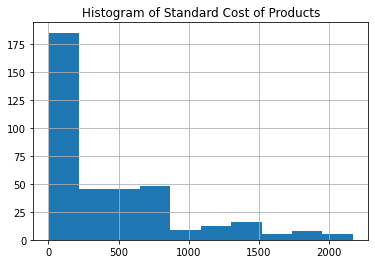

In [100]:
products["StandardCost"].hist()
plt.title("Histogram of Standard Cost of Products")
plt.xlabel("Standard Cost of Products")

Text(0.5, 1.0, 'Spread of Cost of Products')

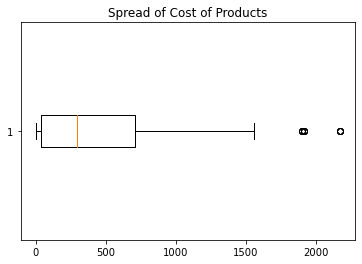

In [99]:
plt.boxplot(products["StandardCost"], vert = False);
plt.title("Spread of Cost of Products")
plt.xlable("Cost of Products")

#The plot shows that there are some outliers

In [106]:
products["ProductLine"].unique()

array(['Sports ', 'Mountain ', 'Road', 'Touring '], dtype=object)

In [107]:
products["ProductCategory"].unique()

array(['Accessories', 'Clothing', 'Components', 'Bikes'], dtype=object)

<AxesSubplot:ylabel='ProductLine'>

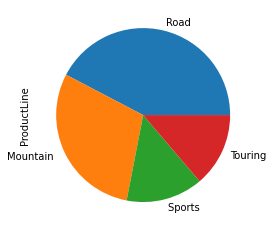

In [113]:
#Distribution of Products in different product lines
products["ProductLine"].value_counts().plot(kind = "pie")

<AxesSubplot:ylabel='ProductCategory'>

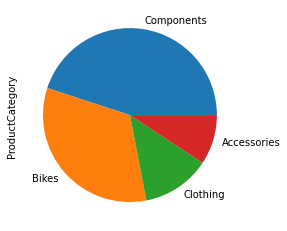

In [114]:
#Distribution of Products in different product category
products["ProductCategory"].value_counts().plot(kind = "pie")

In [117]:
product_sales = pd.merge(sales, products)
product_sales

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,SalesReason,Continent,Country,Region,...,Weekday,Month,Quarter,Year,ProductName,ProductCategory,ProductSubcategory,StandardCost,DaysToManufacture,ProductLine
0,310,21768,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,Canada,Canada,...,Wednesday,December,4,2010,"Road-150 Red, 62",Bikes,Road Bikes,2171.2942,4,Road
1,310,21768,1,2547.0126,3578.27,1031.2574,Quality,North America,Canada,Canada,...,Wednesday,December,4,2010,"Road-150 Red, 62",Bikes,Road Bikes,2171.2942,4,Road
2,310,16624,1,2547.0126,3578.27,1031.2574,Manufacturer,Pacific,Australia,Australia,...,Thursday,December,4,2010,"Road-150 Red, 62",Bikes,Road Bikes,2171.2942,4,Road
3,310,16624,1,2547.0126,3578.27,1031.2574,Quality,Pacific,Australia,Australia,...,Thursday,December,4,2010,"Road-150 Red, 62",Bikes,Road Bikes,2171.2942,4,Road
4,310,27601,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,United States,Southwest,...,Sunday,January,1,2011,"Road-150 Red, 62",Bikes,Road Bikes,2171.2942,4,Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188152,568,24757,1,539.3916,742.35,202.9584,Other,North America,Canada,Canada,...,Saturday,December,4,2013,"Touring-3000 Yellow, 44",Bikes,Touring Bikes,461.4448,4,Touring
188153,568,24757,1,539.3916,742.35,202.9584,Price,North America,Canada,Canada,...,Saturday,December,4,2013,"Touring-3000 Yellow, 44",Bikes,Touring Bikes,461.4448,4,Touring
188154,568,24757,1,539.3916,742.35,202.9584,Other,North America,Canada,Canada,...,Saturday,December,4,2013,"Touring-3000 Yellow, 44",Bikes,Touring Bikes,461.4448,4,Touring
188155,568,24757,1,539.3916,742.35,202.9584,Price,North America,Canada,Canada,...,Saturday,December,4,2013,"Touring-3000 Yellow, 44",Bikes,Touring Bikes,461.4448,4,Touring


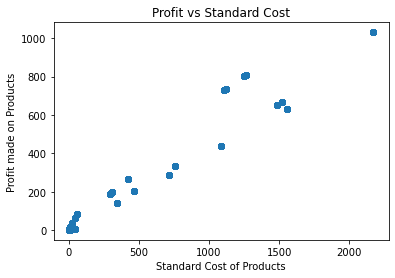

In [120]:
#Correlation between cost and profit
plt.scatter(x= product_sales["StandardCost"], y= product_sales["Profit"])
plt.xlabel("Standard Cost of Products")
plt.ylabel("Profit made on Products")
plt.title("Profit vs Standard Cost");

<AxesSubplot:title={'center':'Profit and Sales by Product Line'}, xlabel='Product Line', ylabel='Amount'>

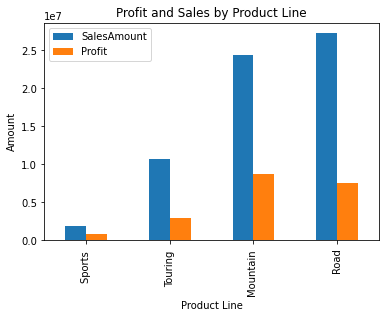

In [133]:
(pd.DataFrame(product_sales.groupby("ProductLine")[["SalesAmount", "Profit"]].sum().sort_values(by = "SalesAmount"))
 .plot(kind = "bar", xlabel = "Product Line", ylabel = "Amount", title = "Profit and Sales by Product Line"))


<AxesSubplot:title={'center':'Total Orders by Product Line'}, xlabel='Product Line', ylabel='Total Orders'>

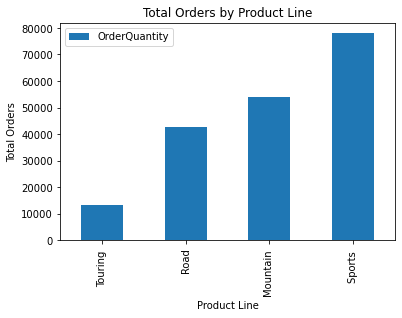

In [137]:
(pd.DataFrame(product_sales.groupby("ProductLine")["OrderQuantity"].sum().sort_values()).
 plot(kind = "bar", xlabel = "Product Line", ylabel = "Total Orders", title = "Total Orders by Product Line"))


<AxesSubplot:title={'center':'Total Orders by Product Line'}, ylabel='Total Orders'>

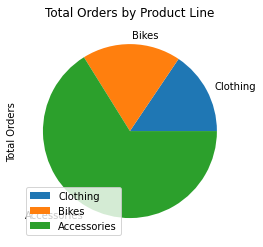

In [141]:
(pd.DataFrame(product_sales.groupby("ProductCategory")["OrderQuantity"].sum().sort_values()).
 plot(kind = "pie", y= "OrderQuantity",
      xlabel = "Product Category", ylabel = "Total Orders", 
      title = "Total Orders by Product Line"))

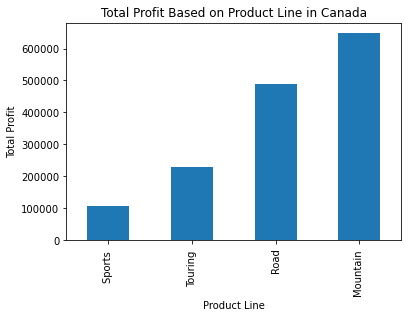

In [164]:
product_sales_canada = product_sales[product_sales["Country"]== "Canada"]

(product_sales_canada.groupby("ProductLine")["Profit"].sum().sort_values().
 plot(kind = "bar", xlabel = "Product Line", ylabel = "Total Profit", 
 title = "Total Profit Based on Product Line in Canada"));

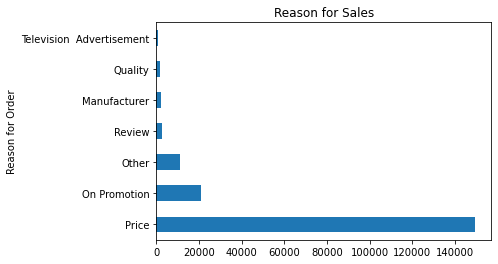

In [160]:
#reason for sales
(sales.groupby("SalesReason")["OrderQuantity"].sum().sort_values(ascending = False).
plot(kind = "barh", ylabel = "Total Orders", xlabel = "Reason for Order", title = "Reason for Sales"));

In [169]:
#importing the customer table

customers = pd.read_csv("Customer.csv")
customers

,CustomerKey,GeographyKey,FullName,CustomerAge,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwner,NumberCarsOwned,DateFirstPurchase,City,StateProvince,Country
0,11000,26,Jon Yang V,53,Married,Male,90000,2,0,Bachelors,Professional,Yes,0,1/19/2011,Rockhampton,Queensland,Australia
1,11001,37,Eugene Huang L,48,Single,Male,60000,3,3,Bachelors,Professional,No,1,1/15/2011,Seaford,Victoria,Australia
2,11002,31,Ruben Torres,53,Married,Male,60000,3,3,Bachelors,Professional,Yes,1,1/7/2011,Hobart,Tasmania,Australia
3,11003,11,Christy Zhu,51,Single,Female,70000,0,0,Bachelors,Professional,No,1,12/29/2010,North Ryde,New South Wales,Australia
4,11004,19,Elizabeth Johnson,45,Single,Female,80000,5,5,Bachelors,Professional,Yes,4,1/23/2011,Wollongong,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,209,Tommy Tang L,55,Married,Male,30000,1,0,Graduate Degree,Clerical,Yes,0,9/4/2012,Versailles,Yveline,France
18480,29480,248,Nina Raji W,47,Single,Female,30000,3,0,Graduate Degree,Clerical,Yes,0,7/17/2013,London,England,United Kingdom
18481,29481,120,Ivan Suri,59,Single,Male,30000,3,0,Graduate Degree,Clerical,No,0,8/13/2011,Hof,Bayern,Germany
18482,29482,179,Clayton Zhang,60,Married,Male,30000,3,0,Bachelors,Clerical,Yes,0,9/18/2012,Saint Ouen,Charente-Maritime,France


In [170]:
customers.shape

(18484, 17)

In [171]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   FullName              18484 non-null  object
 3   CustomerAge           18484 non-null  int64 
 4   MaritalStatus         18484 non-null  object
 5   Gender                18484 non-null  object
 6   YearlyIncome          18484 non-null  int64 
 7   TotalChildren         18484 non-null  int64 
 8   NumberChildrenAtHome  18484 non-null  int64 
 9   EnglishEducation      18484 non-null  object
 10  EnglishOccupation     18484 non-null  object
 11  HouseOwner            18484 non-null  object
 12  NumberCarsOwned       18484 non-null  int64 
 13  DateFirstPurchase     18484 non-null  object
 14  City                  18484 non-null  object
 15  StateProvince         18484 non-null

In [172]:
customers.head()

,CustomerKey,GeographyKey,FullName,CustomerAge,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwner,NumberCarsOwned,DateFirstPurchase,City,StateProvince,Country
0,11000,26,Jon Yang V,53,Married,Male,90000,2,0,Bachelors,Professional,Yes,0,1/19/2011,Rockhampton,Queensland,Australia
1,11001,37,Eugene Huang L,48,Single,Male,60000,3,3,Bachelors,Professional,No,1,1/15/2011,Seaford,Victoria,Australia
2,11002,31,Ruben Torres,53,Married,Male,60000,3,3,Bachelors,Professional,Yes,1,1/7/2011,Hobart,Tasmania,Australia
3,11003,11,Christy Zhu,51,Single,Female,70000,0,0,Bachelors,Professional,No,1,12/29/2010,North Ryde,New South Wales,Australia
4,11004,19,Elizabeth Johnson,45,Single,Female,80000,5,5,Bachelors,Professional,Yes,4,1/23/2011,Wollongong,New South Wales,Australia


In [173]:
#Checking for null values
customers.isna().sum()

CustomerKey             0
GeographyKey            0
FullName                0
CustomerAge             0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
EnglishOccupation       0
HouseOwner              0
NumberCarsOwned         0
DateFirstPurchase       0
City                    0
StateProvince           0
Country                 0
dtype: int64

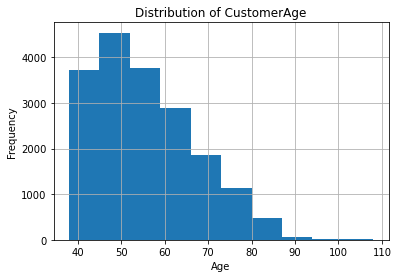

In [176]:
customers["CustomerAge"].hist();
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of CustomerAge");

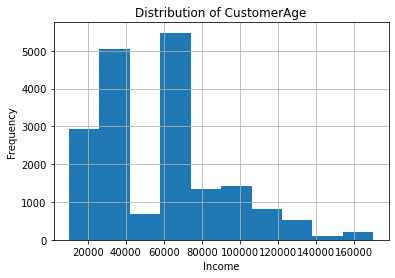

In [178]:
customers["YearlyIncome"].hist();
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of CustomerAge");

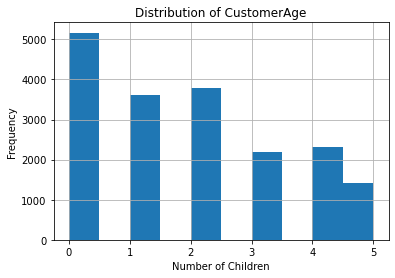

In [185]:
customers["TotalChildren"].hist();
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.title("Distribution of Customers' Number of Children");

In [186]:
customers.head()

,CustomerKey,GeographyKey,FullName,CustomerAge,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwner,NumberCarsOwned,DateFirstPurchase,City,StateProvince,Country
0,11000,26,Jon Yang V,53,Married,Male,90000,2,0,Bachelors,Professional,Yes,0,1/19/2011,Rockhampton,Queensland,Australia
1,11001,37,Eugene Huang L,48,Single,Male,60000,3,3,Bachelors,Professional,No,1,1/15/2011,Seaford,Victoria,Australia
2,11002,31,Ruben Torres,53,Married,Male,60000,3,3,Bachelors,Professional,Yes,1,1/7/2011,Hobart,Tasmania,Australia
3,11003,11,Christy Zhu,51,Single,Female,70000,0,0,Bachelors,Professional,No,1,12/29/2010,North Ryde,New South Wales,Australia
4,11004,19,Elizabeth Johnson,45,Single,Female,80000,5,5,Bachelors,Professional,Yes,4,1/23/2011,Wollongong,New South Wales,Australia


<AxesSubplot:ylabel='MaritalStatus'>

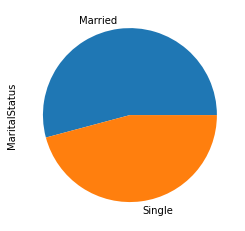

In [191]:
customers["MaritalStatus"].value_counts().plot(kind = "pie", title = "Marital Status of Customers")

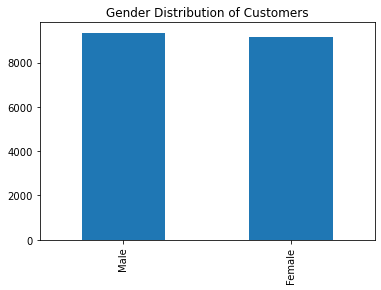

In [195]:
customers["Gender"].value_counts().plot(kind = "bar", title = "Gender Distribution of Customers");

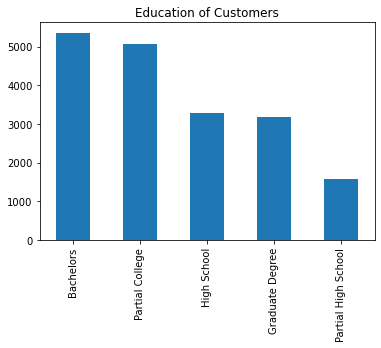

In [196]:
customers["EnglishEducation"].value_counts().plot(kind = "bar", title = "Education of Customers");

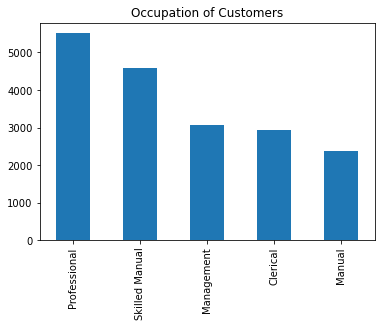

In [197]:
customers["EnglishOccupation"].value_counts().plot(kind = "bar", title = "Occupation of Customers");

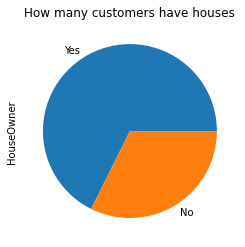

In [200]:
customers["HouseOwner"].value_counts().plot(kind = "pie", title = "How many customers have houses");

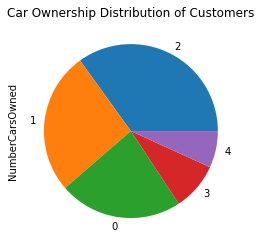

In [202]:
customers["NumberCarsOwned"].value_counts().plot(kind = "pie", title = "Car Ownership Distribution of Customers");

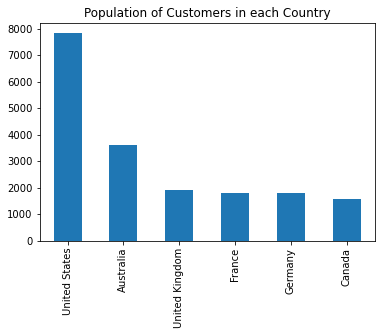

In [204]:
customers["Country"].value_counts().plot(kind = "bar", title = "Population of Customers in each Country");

In [212]:

print("Total Number of Customers:", customers["CustomerKey"].count())

Total Number of Customers: 18484


In [216]:
#Oldest Customers
customers[customers["DateFirstPurchase"] == customers["DateFirstPurchase"].max()]["FullName"]

2030            Sophia Lopez C 
5079           Natalie Carter  
6175           Amanda Roberts  
6282        Alyssa Alexander M 
6862             Aaron Baker E 
6888                Mandy Liu  
7037            Bruce Garcia B 
7050              Sara Cooper  
7531           Thomas Simmons  
7825           Brandon Smith A 
10144        Lucas Richardson  
10155        Jeremiah Flores D 
10360            Orlando Gill  
10716            Gerald Sara C 
10867    Mr. Michael Ruggiero  
11503            Sandra Zhao S 
11783            Isaac Green C 
13027              Omar Tang L 
14345          Olivia Powell B 
15209                Jan Cox R 
15535            Kelly Perry E 
16144           Franklin Shen  
16225           Isaac Murphy L 
17703         Felicia Suarez W 
18330             Alexa Ward W 
Name: FullName, dtype: object

In [218]:
#Merging the three files
product_sales_customers = pd.merge(product_sales, customers)
product_sales_customers

,ProductKey,CustomerKey,OrderQuantity,OverallProductCost,SalesAmount,Profit,SalesReason,Continent,Country,Region,...,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwner,NumberCarsOwned,DateFirstPurchase,City,StateProvince
0,310,21768,1,2547.0126,3578.27,1031.2574,Manufacturer,North America,Canada,Canada,...,70000,5,0,Bachelors,Management,Yes,3,12/29/2010,Metchosin,British Columbia
1,310,21768,1,2547.0126,3578.27,1031.2574,Quality,North America,Canada,Canada,...,70000,5,0,Bachelors,Management,Yes,3,12/29/2010,Metchosin,British Columbia
2,310,16624,1,2547.0126,3578.27,1031.2574,Manufacturer,Pacific,Australia,Australia,...,90000,0,0,Bachelors,Professional,No,3,12/30/2010,Perth,South Australia
3,310,16624,1,2547.0126,3578.27,1031.2574,Quality,Pacific,Australia,Australia,...,90000,0,0,Bachelors,Professional,No,3,12/30/2010,Perth,South Australia
4,537,16624,1,16.7650,35.00,18.2350,Price,Pacific,Australia,Australia,...,90000,0,0,Bachelors,Professional,No,3,12/30/2010,Perth,South Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188152,569,28488,1,539.3916,742.35,202.9584,On Promotion,Pacific,Australia,Australia,...,20000,0,0,Partial College,Manual,Yes,0,6/17/2013,Melbourne,Victoria
188153,569,24955,1,539.3916,742.35,202.9584,On Promotion,North America,United States,Southwest,...,30000,5,0,Partial High School,Skilled Manual,Yes,3,7/7/2013,Chula Vista,California
188154,569,27768,1,539.3916,742.35,202.9584,On Promotion,Europe,France,France,...,20000,1,1,High School,Manual,No,1,10/17/2013,Orleans,Loiret
188155,568,25759,1,539.3916,742.35,202.9584,On Promotion,Europe,France,France,...,20000,1,1,Partial College,Manual,Yes,1,2/22/2013,Saint Germain en Laye,Yveline


In [226]:
product_sales_customers.drop(columns = ["ProductKey", "CustomerKey", "SalesReason", "Country", 
                                        "Region", "DateFirstPurchase", "StateProvince", "City", "Continent", "OrderDate", 
                                       "Month", "Weekday", "Quarter", "DaysToManufacture", 
                                        "ProductSubcategory", "GeographyKey"], inplace = True)

<AxesSubplot:>

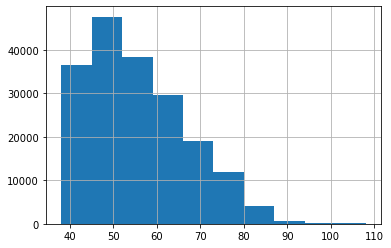

In [232]:
product_sales_customers["CustomerAge"].hist()
plt.xlabel("Age of Customers")
plt.ylabel("Frequency of Orders")
plt.title("Distribution of Orders by Age of Customers")

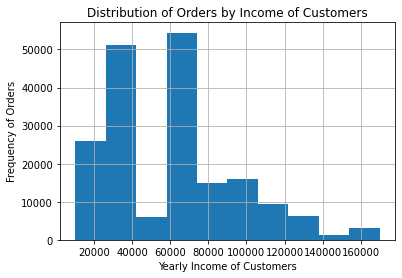

In [235]:
product_sales_customers["YearlyIncome"].hist()
plt.xlabel("Yearly Income of Customers")
plt.ylabel("Frequency of Orders")
plt.title("Distribution of Orders by Income of Customers");

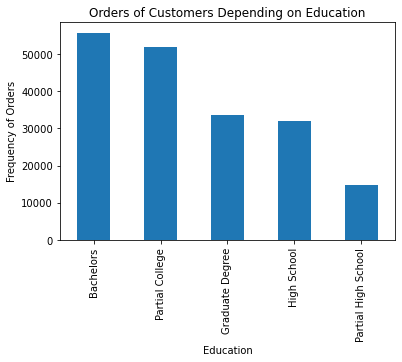

In [238]:
(product_sales_customers["EnglishEducation"].value_counts().
 plot(kind = "bar", xlabel = "Education", ylabel = "Frequency of Orders",
     title = "Orders of Customers Depending on Education"));

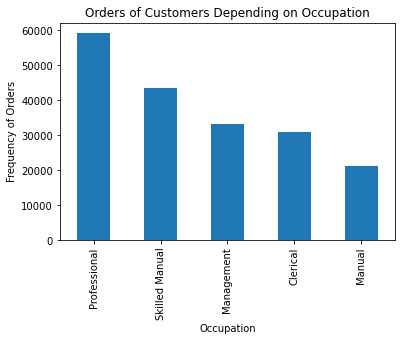

In [239]:
(product_sales_customers["EnglishOccupation"].value_counts().
 plot(kind = "bar", xlabel = "Occupation", ylabel = "Frequency of Orders",
     title = "Orders of Customers Depending on Occupation"));

Management


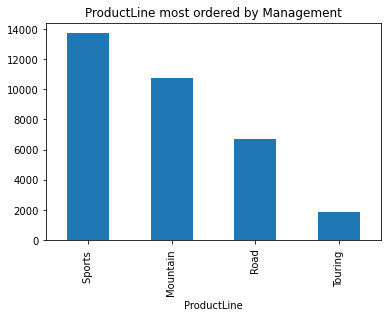

Professional


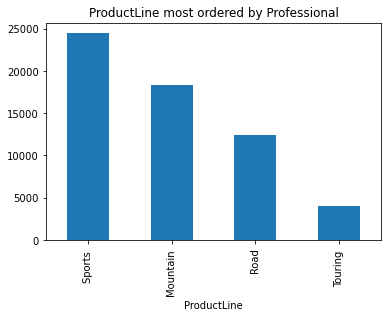

Skilled Manual


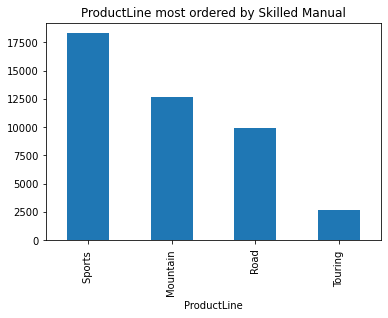

Manual


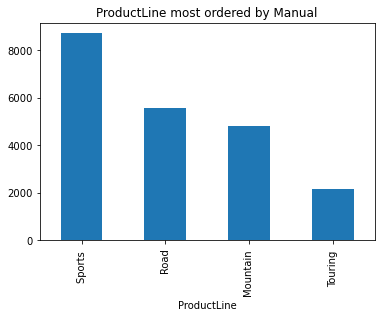

Clerical


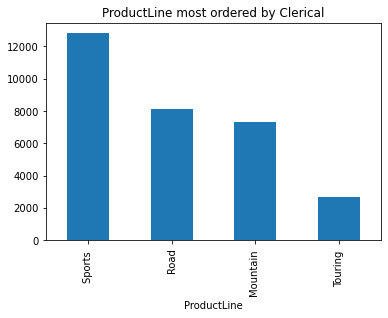

In [250]:
for occupation in product_sales_customers["EnglishOccupation"].unique():
    (product_sales_customers[product_sales_customers["EnglishOccupation"] == occupation].
     groupby("ProductLine")["OrderQuantity"].sum().sort_values(ascending = False).
    plot(kind = "bar", title = f"ProductLine most ordered by {occupation}"))
    plt.show()

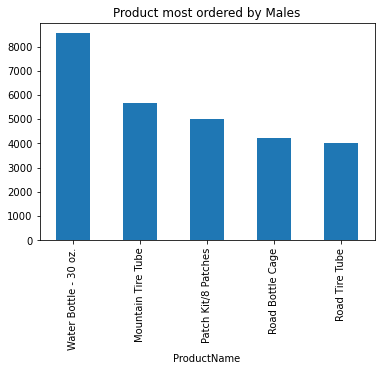

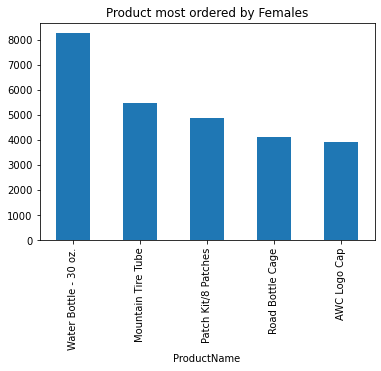

In [254]:
for gender in product_sales_customers["Gender"].unique():
    (product_sales_customers[product_sales_customers["Gender"] == gender].
     groupby("ProductName")["OrderQuantity"].sum().sort_values(ascending = False).head(5).
    plot(kind = "bar", title = f"Product most ordered by {gender}s"))
    plt.show()

<AxesSubplot:xlabel='YearlyIncome', ylabel='SalesAmount'>

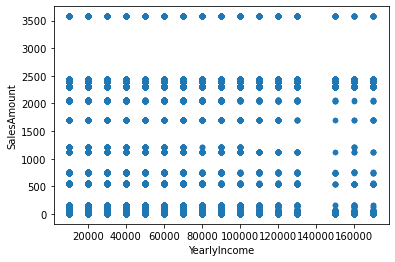

In [256]:
product_sales_customers.plot(kind = "scatter", x = "YearlyIncome", y = "SalesAmount")

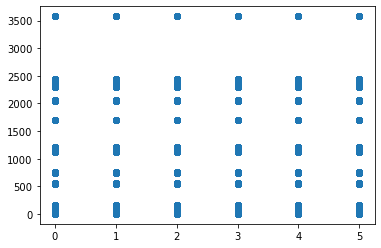

In [260]:
plt.scatter(product_sales_customers["TotalChildren"], product_sales_customers["SalesAmount"])